In [21]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

In [23]:
# Load the target image
def load_image(image_path, target_size=(128, 128)):
    """Load and preprocess the image."""
    image = Image.open(image_path)
    image = image.resize(target_size)  # Resize to the specified dimensions
    image = np.array(image) / 255.0  # Normalize pixel values
    return image

In [25]:
def generate_random_image(shape):
    """Generate a random image with the same shape as the target image."""
    return np.random.rand(*shape)

In [27]:
def calculate_fitness(target, individual):
    """Calculate fitness as the inverse of the mean squared error."""
    error = np.mean((target - individual) ** 2)
    return 1 / (1 + error)

In [29]:
def mutate(individual, mutation_rate=0.005):
    """Randomly mutate the image."""
    mutation = np.random.rand(*individual.shape) < mutation_rate
    individual[mutation] = np.random.rand(np.sum(mutation))
    return individual

In [31]:
def crossover(parent1, parent2):
    """Perform crossover between two parent images."""
    mask = np.random.rand(*parent1.shape) < 0.5
    child = np.where(mask, parent1, parent2)
    return child

In [33]:
def evolve_population(target, population, mutation_rate=0.005):
    """Evolve the population for one generation."""
    fitness_scores = [calculate_fitness(target, individual) for individual in population]
    sorted_population = [individual for _, individual in sorted(zip(fitness_scores, population), reverse=True)]

    new_population = []
    for i in range(len(population) // 2):
        parent1, parent2 = sorted_population[i], sorted_population[i + 1]
        child1 = mutate(crossover(parent1, parent2), mutation_rate)
        child2 = mutate(crossover(parent1, parent2), mutation_rate)
        new_population.extend([child1, child2])

    return new_population, max(fitness_scores)

In [35]:
def main(image_path, generations=5000, population_size=20, mutation_rate=0.005, target_size=(128, 128)):
    """Main function to run the genetic algorithm."""
    target = load_image(image_path, target_size=target_size)
    population = [generate_random_image(target.shape) for _ in range(population_size)]

    for generation in range(generations):
        population, max_fitness = evolve_population(target, population, mutation_rate)

        if generation % 500 == 0:
            print(f"Generation {generation}, Max Fitness: {max_fitness}")
            plt.imshow(population[0])
            plt.title(f"Generation {generation}")
            plt.axis('off')
            plt.show()

    print("Final Generation:")
    plt.imshow(population[0])
    plt.title("Evolved Image")
    plt.axis('off')
    plt.show()

Generation 0, Max Fitness: 0.8664107255487979


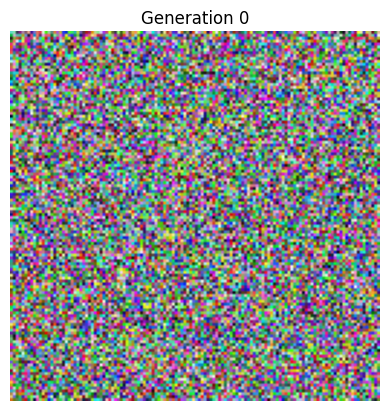

Generation 500, Max Fitness: 0.8857458787510356


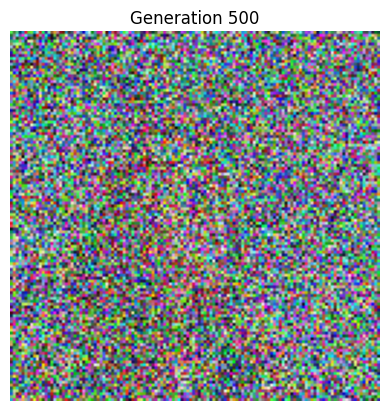

Generation 1000, Max Fitness: 0.8875098809243992


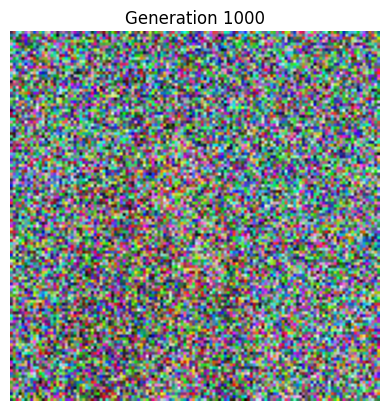

Generation 1500, Max Fitness: 0.8878388500977483


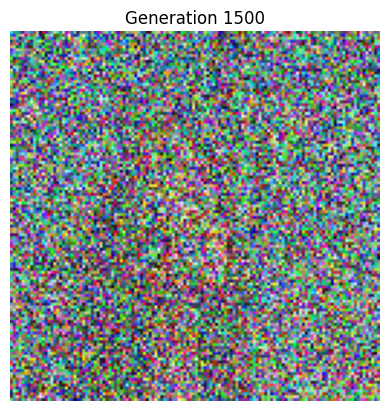

Generation 2000, Max Fitness: 0.8876798113199456


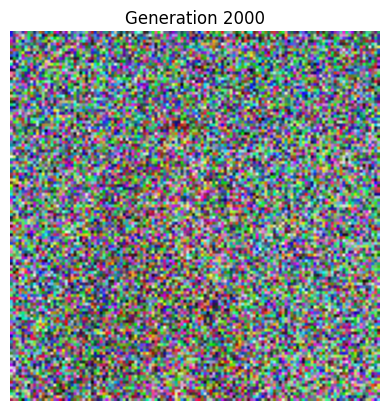

Generation 2500, Max Fitness: 0.8882066146668656


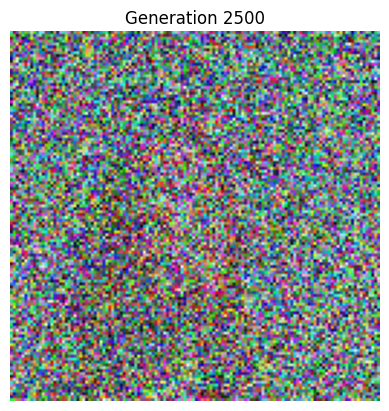

Generation 3000, Max Fitness: 0.887462647447939


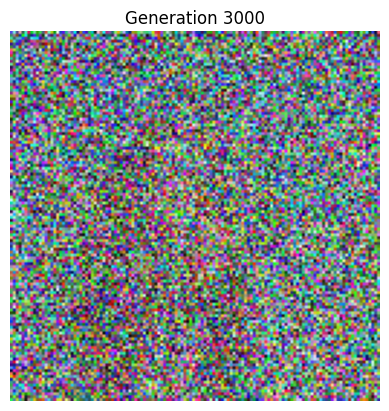

Generation 3500, Max Fitness: 0.8881717586409531


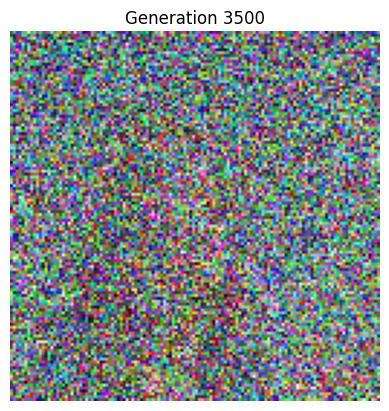

Generation 4000, Max Fitness: 0.8882988682607538


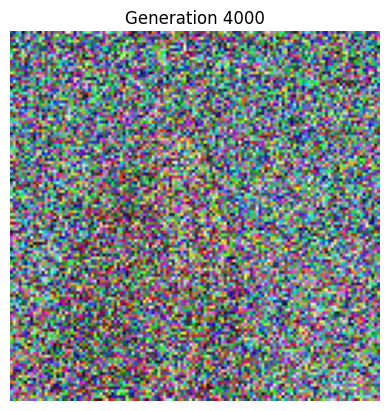

Generation 4500, Max Fitness: 0.8877207010156842


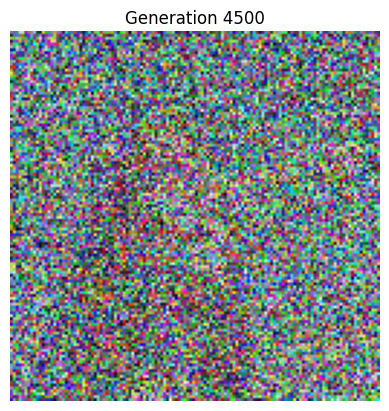

Final Generation:


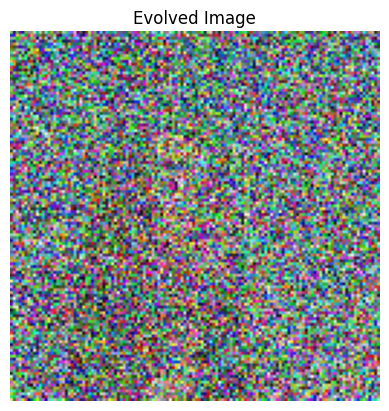

In [37]:

if __name__ == "__main__":
    image_path = "C:\\Users\\adity\\OneDrive\\Pictures\\Pinterest\\gettyimages-1450268558-612x612.jpg"
    main(image_path)